# Example of DBSCAN implementation

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


## Data Preparation

In [29]:
# Semilla para reproducibilidad
np.random.seed(42)

num_samples = 500

# Generar el primer grupo de datos (centro en [1, 1])
mean_group1 = [4, 4]
cov_group1 = [[1, 0], [0, 1]]
group1_data = np.random.multivariate_normal(mean_group1, cov_group1, num_samples)

# Generar el segundo grupo de datos (centro en [1, -1])
mean_group2 = [4, -4]
cov_group2 = [[1, 0], [0, 1]]
group2_data = np.random.multivariate_normal(mean_group2, cov_group2, num_samples)

# Generar el primer grupo de datos (centro en [-1, 1])
mean_group1 = [-4, 4]
cov_group1 = [[1, 0], [0, 1]]
group3_data = np.random.multivariate_normal(mean_group1, cov_group1, num_samples)

# Generar el segundo grupo de datos (centro en [-1, -1])
mean_group2 = [-4, -4]
cov_group2 = [[1, 0], [0, 1]]
group4_data = np.random.multivariate_normal(mean_group2, cov_group2, num_samples)

# Combinar los dos grupos en un solo arreglo X
X = np.concatenate((group1_data, group2_data, group3_data, group4_data), axis=0)

# Etiquetas para los dos grupos (0 para el Grupo 1, 1 para el Grupo 2)
y_group1 = np.zeros(num_samples)
y_group2 = np.ones(num_samples)
y_group3 = np.array([2 for i in range(num_samples)])
y_group4 = np.array([3 for i in range(num_samples)])
y = np.concatenate((y_group1, y_group2, y_group3, y_group4), axis=0)


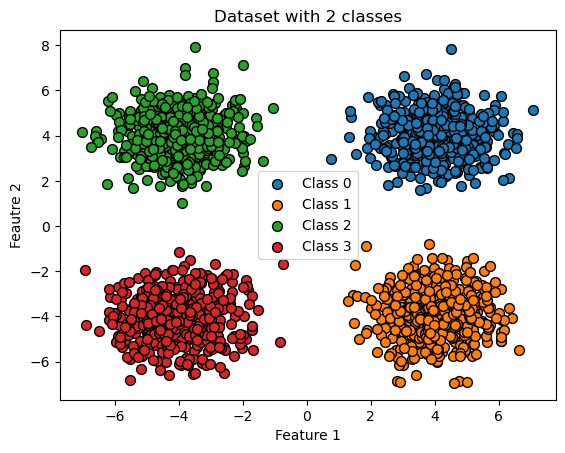

In [30]:
# Show the data in a scatter plot
plt.figure()
plt.title('Dataset with 2 classes')
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], s=50, label='Class %d' % i, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feautre 2')
plt.legend()
plt.show()

## Application of the K-Means method

### Calculate the Accuracy

In [31]:
# Apply the DBSCAN algorithm
dbscan = DBSCAN(eps=0.7, min_samples=10)
y_pred = dbscan.fit_predict(X)

print('Accuracy: %.2f' % accuracy_score(y, y_pred))

Accuracy: 0.98


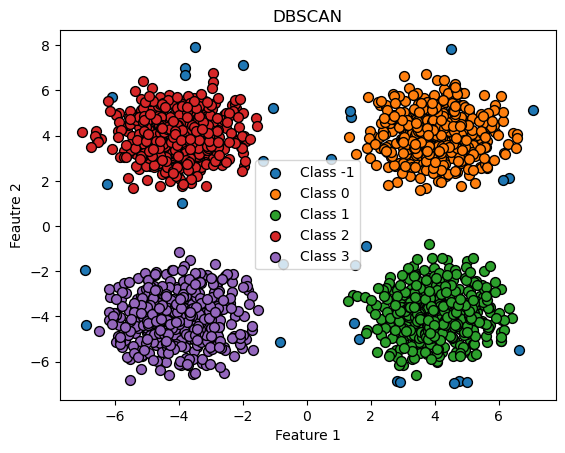

In [32]:
# Show the data in a scatter plot
plt.figure()
plt.title('DBSCAN')
for i in np.unique(y_pred):
    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], s=50, label='Class %d' % i, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feautre 2')
plt.legend()
plt.show()